In [39]:
data=dlmread("analysis.csv");

data2=dlmread("analysis_invalids.csv");
no_route_idx = data2(:,7) < 0;
no_route = data2(no_route_idx, :)(:, [1 4]);


for i = 1:length(no_route)
  src = no_route(i, 1); dst = no_route(i, 2);
  data((data(:,1)==src)&(data(:,4)==dst), :) = [];
endfor


In [40]:
valid = data(:,8) >= 0;
n_valid = sum(valid == 1);
n_invalid = sum(valid == 0);

data_valid = data(valid, :);
l_dijk = data_valid(:,7);
l_calc = data_valid(:,8);
l_ratio =  l_calc ./ l_dijk;

In [41]:
n_valid

n_valid =  1446


In [42]:
n_invalid

n_invalid =  375


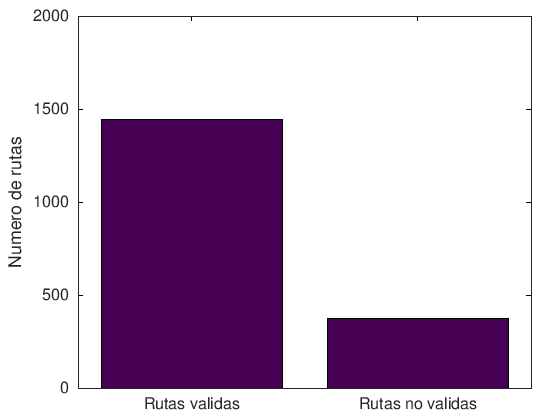

In [43]:
bar([n_valid, n_invalid])
set(gca, "fontsize", 16)
set(gca, 'XTickLabel', ["Rutas validas";"Rutas no validas"]);  
xlabel("")
ylabel("Numero de rutas")
title("")

In [44]:
mean(l_ratio)

ans =  4.3099


In [45]:
std(l_ratio)

ans =  4.6343


In [46]:
median(l_ratio)

ans =  3.0086


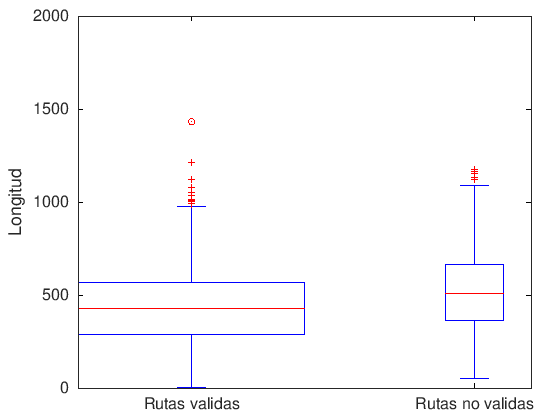

In [47]:
pkg load statistics
axis ([-10,3]);
boxplot ({l_dijk, l_dijk_invalid});
set(gca (), "xtick", [1 2], "xticklabel", {"Rutas validas";"Rutas no validas"})
ylabel("Longitud")

set(gca, "fontsize", 16)


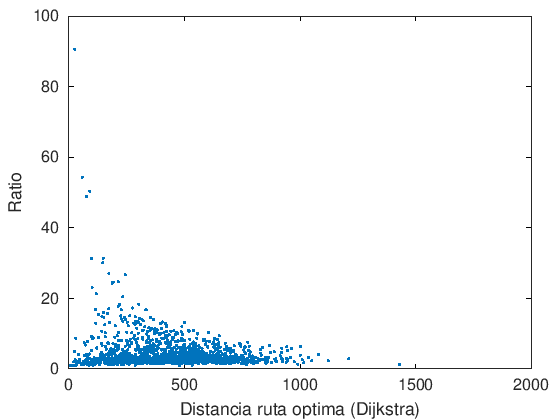

In [48]:
plot(l_dijk, l_ratio, '.')
xlabel("Distancia ruta optima (Dijkstra)")
ylabel("Ratio")
%title("Ratio distancia ruta calculada / distancia ruta optima")
set(gca, "fontsize", 16)



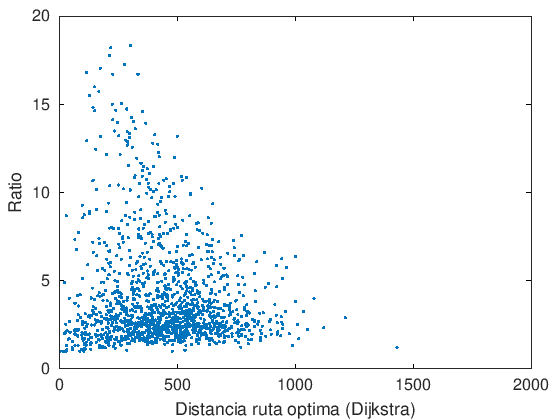

In [49]:
plot(l_dijk, l_ratio, '.')
ylim([0 20])
xlabel("Distancia ruta optima (Dijkstra)")
ylabel("Ratio")
%title("Ratio distancia ruta calculada / distancia ruta optima (detalle)")
set(gca, "fontsize", 16)


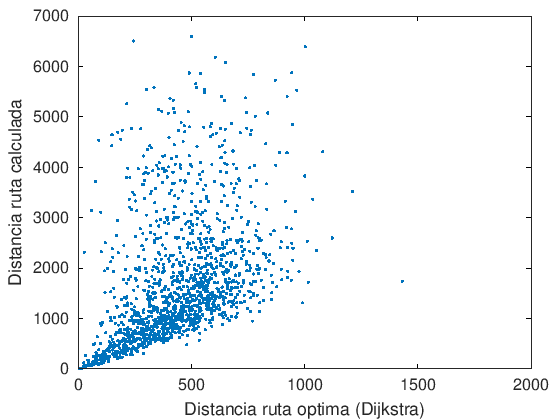

In [50]:
plot(l_dijk, l_calc, '.')
xlabel("Distancia ruta optima (Dijkstra)")
ylabel("Distancia ruta calculada")
%title("Relacion entre la distancia ruta calculada y la distancia ruta optima")
set(gca, "fontsize", 16)




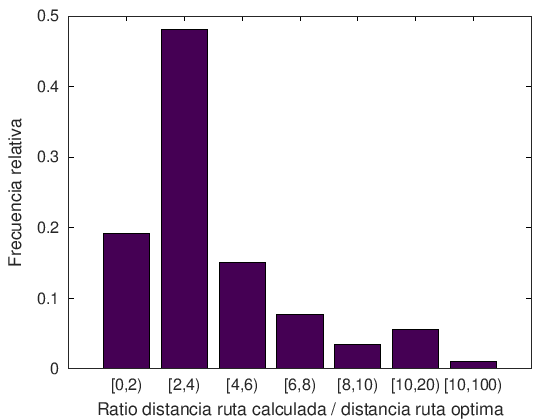

In [51]:
labels_ratio = ['[0,2)';'[2,4)';'[4,6)';'[6,8)';'[8,10)';'[10,20)';'[10,100)'];
hist_bins_ratio = [0,2,4,6,8,10,20,100];
hist_ratio = histc(l_ratio, hist_bins_ratio)(1:end-1) ./ n_valid;
bar(hist_ratio)
set(gca, "fontsize", 16)
set(gca, 'XTickLabel', labels_ratio);  
xlabel("Ratio distancia ruta calculada / distancia ruta optima")
ylabel("Frecuencia relativa")
%title("Distribucion de la ratio entre la distancia de la \nruta calculada y la distancia de la ruta optima")

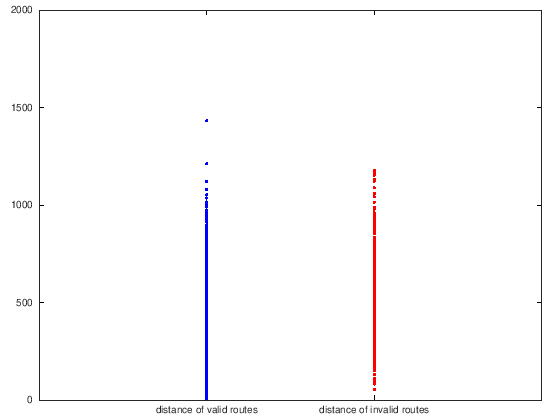

In [52]:
l_dijk_invalid = data2(data2(:,7) > 0, :)(:,7);

plot(ones(size(l_dijk)), l_dijk, '.b')
hold on
plot(2 * ones(size(l_dijk_invalid)), l_dijk_invalid, '.r')
hold off
set(gca, 'xtick', [1, 2]);
set(gca, 'XTickLabel', ["distance of valid routes"; "distance of invalid routes"]);  

xlim([0, 3])
